# Project 2: Forest Fire Simulation

In this project, you will simulate the spread of a forest fire on a 100×100 grid. Each cell in the grid can be in one of four states: tree, grassland, burning tree, or burnt tree. The goal is to understand how forest density influences fire spread, and to explore extensions such as the effect of wind.

## Part 1: Initial Setup of the Grid
- Grid and States:
- Create a 100×100 NumPy array to represent the forest.
- Each cell can have one of the following values:
	0: Grassland (non-flammable)
	1: Tree
	2: Burning tree
	3: Burnt tree
- Random Initialization: 
	- Implement a function that initializes the grid with trees and grassland based on a tree density parameter (between 0 and 1).
	- Each cell should be a tree with probability = density, and grassland otherwise.
Lightning Strike:
	- Randomly select a cell that contains a tree (1) and set it to burning (2).

## Part 2: Fire Spread Simulation
- Simulation Step:
	- In each time step:
		- A burning tree (2) becomes a burnt tree (3).
		- All trees (1) that are directly adjacent (up, down, left, right) to a burning tree catch fire and become burning trees (2) in the next step.
- Run the Simulation:
	-Continue the simulation step-by-step until no more trees are burning.
- Track Results:
	- Record the number of trees burnt at the end of the simulation.
- Calculate the percentage of trees burnt compared to the initial number of trees.


## Part 3: Visualization and Analysis
- Graphical Representation:
	- Write a function that can visualize the grid at each time step by using matplotlib. Use different colors for each state.
	- Write a function that allows you to created an animated gif for a full run of the simulation, where each frame/picture corresponds to a time-step
- Density Curve:
	- Run the simulation for various density values (e.g., from 0.1 to 1.0 in steps of 0.05). Clearly you need to run the simulation several times for each density value and take then the mean value of the resulting percentage of trees burnt.
	- Plot the percentage of trees burnt as a function of the initial density including the statistical uncertainties.
- Critical Density:
	- From the plot, identify the critical density above which the fire spreads through almost the entire forest.
- Expert Challenge (not strictly required to be handed in, however is required for achieving the best mark): Larger grids, e.g. 1000x1000 require in a naive simulation significantly more time, hence it is advisable to think about certain optimization aspects. One promising approach is a clever usage of numpy arrays and slicing. You can add one additional "optimizedSimulation" function that can handle efficiently also larger map sizes and is more time-effective than a naive approach that directly loops on your arrays.

## Part 4: Extensions – Wind Effect
- Wind Influence:
	- Modify the fire-spread rule to account for wind blowing in one direction (e.g., east). For example, a tree that is east of a burning tree can catch fire even if it is not only the direct next neighbour. The strength of the wind might determine the spread radius in one direction. It is important that you come up here with your own model of how wind might effect the spread of fire. It is your task for explain the choice of your model. Think independently! As long as your model choice is sensible, you will get full points. 
Discuss:
	- What impact does wind have on the spread of the fire in your model?
	- How does the critical density change when wind is included?

## Deliverables:
- A Jupyter-Notebook implementing the simulation, including
	- A plot showing burnt tree percentage vs. initial density.
	- One Animation of the fire spreading at a given density and one lighting event.
	- A brief written summary of findings and observations about the critical density and wind effects.

# Solution

The implementation is provided in the following cell.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def initialize (density, size = (100,100)):
    """Initializes grid representing the forest.

    Parameters
    ----------
    density: (float) probability that any given cell is a tree
    size: size of grid; default: (100, 100)
    
    Returns
    -------
    grid
        Numpy array of input size with values 0, 1, and 2. Exactly one cell has value 2.
    """
    grid = np.random.binomial(1, density, size = size)  # Set up grid

    trees = np.transpose(np.nonzero(grid))  # Extract indices where there are trees

    # Transpose is needed as nonzero() gives a tuple of arrays; 
    #       transpose() turns it into an array consisting of two-item lists

    lightning = np.random.choice(np.arange(trees[:,0].size))  # Select random tree
    grid[tuple(trees[lightning,:])] = 2  # Lightning strikes selected tree

    return grid

def get_trees(grid):
    """ Finds total number of trees in forest

    Parameters
    ----------
    grid: numpy array representing the forest whose trees are to be counted
    
    Returns
    -------
    int type: total number of trees in forest; computed as number of non-grassland cells
    """

    trees = grid[np.nonzero(grid)]

    return trees.size

def evolve (grid):
    """
    Changes the status of every burning tree to a burnt tree, and of every tree adjacent to
    it to a burning tree, if not burnt already.
    Parameters
    ----------
    grid: numpy array representing the forest

    Returns
    -------
    grid: numpy array with updated values
    """
    width = grid[0,:].size  # Read off width of forest
    height = grid[:,0].size  # Read off height of forest

    burning_trees = np.transpose(np.where(grid==2))  # Find burning trees
    burning_trees = [tuple(ii) for ii in burning_trees]  # Turn indices into tuples to call elements

    # The following is done on all burning trees found in the forest
    for tree in burning_trees:
        grid[tree] = 3  # Change status to burnt tree
        row, col = tree  # Read off index of burnt tree

        # Indices of neighboring trees:
        up = (row-1, col)
        down = (row+1, col)
        left = (row, col-1)
        right = (row, col+1)

        # If a tree is not on some edge and adjacent cell is a tree, 
        #    change adjacent cell to a burning tree
        if row > 0 and grid[up]==1:
            grid[up] = 2

        if row < height - 1 and grid[down]==1:
            grid[down] = 2

        if col > 0 and grid[left]==1:
            grid[left] = 2

        if col < width - 1 and grid[right]==1:
            grid[right] = 2

    return grid

def simulate(grid):
    """
    Runs forest fire simulation on the input initial condition until no tree is burning

    Parameters
    ----------
    grid: numpy array representing the forest's initial condition after lightning strike

    Returns
    -------
    grid: numpy array representing the forest after fire stops
    burnt: number of burnt trees
    """

    burning_trees = np.transpose(np.where(grid==2))  # Find burning trees

    # As long as there are burning trees, evolve the simulation one step forward
    while burning_trees.size > 0:
        grid = evolve(grid)

        burning_trees = np.transpose(np.where(grid==2))  # Read off new burning trees


    burnt_tress = (grid == 3)  # Read off burnt trees, once there are no more burning trees

    burnt = grid[burnt_tress].size  # Count burnt trees

    return grid, burnt

We now test the implementation with a tree density of 50% and forest of size 100x100. The total number of trees in the initial state should be close to 5000.

In [2]:
grid = initialize(0.5, (100, 100))

trees = get_trees(grid)

after, burnt = simulate(grid)

print('Initial number of trees: {}'.format(trees))
print('Burnt trees: {}'.format(burnt))
print('Percentage of burnt trees: {:.6f}%'.format(burnt/trees * 100))


Initial number of trees: 4967
Burnt trees: 180
Percentage of burnt trees: 3.623918%


We now visualize the spread of the fire for grids of sizes 100x100, 200x200 and 400x400.

In [ ]:
import matplotlib
from matplotlib import animation
from IPython.display import HTML

# Define the colors for each status
cmap = matplotlib.colors.ListedColormap(["honeydew", "forestgreen", "red", "black"], name='from_list', N=None)

# The code used to produce the animation was inspired by the example in
#      https://matplotlib.org/stable/gallery/animation/dynamic_image.html

def animate(density, size=(100,100)):
    '''
    Animates a forest fire
    '''
    fig, ax = plt.subplots()  # Canvas on which the simulation will be displayed

    ax.set_title('Density: {:.2f}, Grid size: {}'.format(density, size))

    ax.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)  # Turn off axis marks

    ims = []  # Initializes list of visualization at each step

    grid = initialize(density, size)  # Initialize grid

    burning_trees = np.transpose(np.where(grid==2))  # Find burning trees

    # As long as there are burning trees, evolve the grid
    while burning_trees.size > 0:
        grid = evolve(grid)

        im = ax.imshow(grid, cmap=cmap, interpolation='nearest', animated=True)  # Visualize status
        ims += [[im]]  # Record status visualization

        burning_trees = np.transpose(np.where(grid==2))  # Read off burning trees after evolution

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)  # Generate animation
    
    return ani

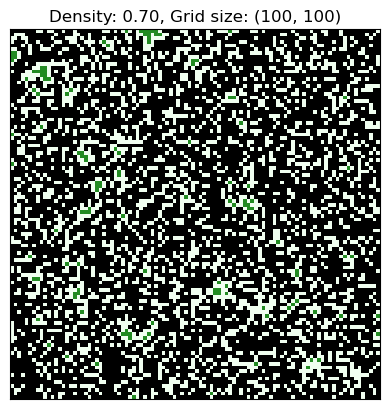

In [4]:
ani = animate(0.7)
ani.save('forest_fire_100x100.gif', fps=30)

HTML(ani.to_html5_video())

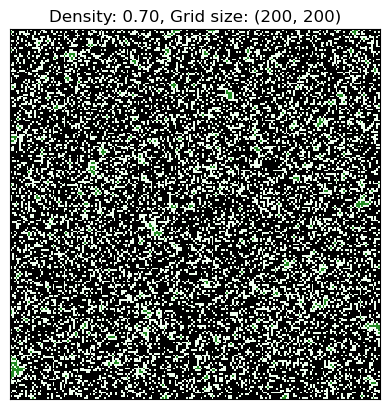

In [5]:
ani = animate(0.7, (200,200))
ani.save('forest_fire_200x200.gif', fps=30)

HTML(ani.to_html5_video())

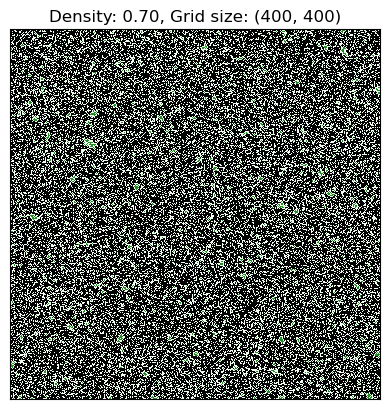

In [6]:
ani = animate(0.7, (400,400))
ani.save('forest_fire_400x400.gif', fps=30)

HTML(ani.to_html5_video())

Now we explore the percentage of burnt trees as a function of the initial density. Since the total number of trees $X$ in the initial configuration follows a binomial distribution $\text{Binom}(p, N^2)$, the number of burnt trees $Y$ can be assumed to be a random variable of the form $kX$ for some constant $k \in (0, 1)$. It then follows that the estimator $Y/X$ is approximately normal. This informs the computation of the error below as the standard deviation.

In [7]:
densities = np.arange(0.1, 1.0, 0.05)  # Densities to be tested
burnt_pct = []  # Contains the percentage of burnt trees for each density in `densities`
error = []  # Contains the statistical error
N = 50  # Number of simulations performed, per density


# For each density, run the simulation N times and average the number of each results
for density in densities:

    trials = np.zeros(N) # Array to record percentages

    for i in range(N):
        grid = initialize(density)

        final_state, burnt = simulate(grid)

        trees = get_trees(grid)

        trials[i] = burnt/trees

    burnt_pct += [np.average(trials)]  # After executing all trials record average pct.
    error += [np.std(trials)]

burnt_pct = np.array(burnt_pct)
error = np.array(error)

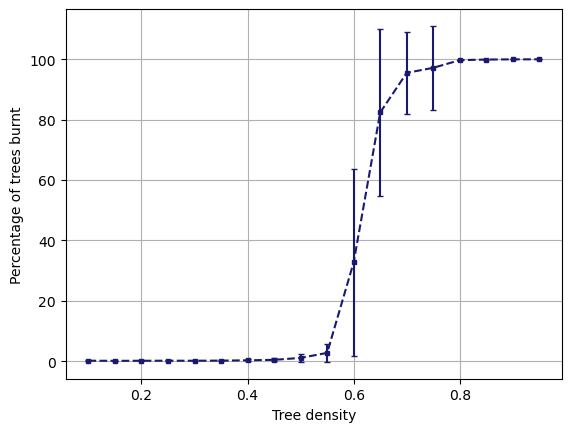

In [8]:
plt.errorbar(densities, burnt_pct * 100, yerr=error * 100, 
             marker='s', ms=3, capsize=2, color='midnightblue', ls='--')  # Plot burnt pct. against tree density

plt.xlabel('Tree density')
plt.ylabel('Percentage of trees burnt')

plt.grid()

plt.show()

According to the simulations above, a density above 0.6 translates to more than 50% of trees burning down. A concentration above 0.8 leads to nearly all trees burning down.

### Wind

The model considering wind assumes it blows due east and has uniform speed over the forest. The wind speed $v$ is given in arbitrary units and determines the probability that a tree a certain distance to the east catches fire. Namely, the probability that a cell containing a tree, $n$ units due east to a burning tree has probability $P(n) = \exp(-n/v)$ of catching fire. In this model, trees that are further away are less likely to catch on fire and the higher the windspeed, the more likely a nearby tree will burn.

For simplicity, if a tree has less than 5% chance of burning, it will not catch fire at all.

The following cell modifies the evolve() function to account for wind.

In [9]:
def evolve (grid, wind = False, wind_speed = 3):
    """
    Moves time forward by one step
    Parameters
    ----------
    grid: numpy array representing the forest
    wind: True (resp. False) evolves with (resp. without) wind
    wind_speed: positive constant determines wind strength 

    Returns
    -------
    grid: numpy array with updated values
    """
    width = grid[0,:].size  # Read off width of forest
    height = grid[:,0].size  # Read off height of forest

    burning_trees = np.transpose(np.where(grid==2))  # Find burning trees
    burning_trees = [tuple(ii) for ii in burning_trees]  # Turn indices into tuples to call elements

    # The following is done on all burning trees found in the forest
    for tree in burning_trees:
        grid[tree] = 3  # Change status to burnt tree
        row, col = tree  # Read off index of burnt tree

        # Indices of neighboring trees:
        up = (row-1, col)
        down = (row+1, col)
        left = (row, col-1)
        right = (row, col+1)

        # If a tree is not on some edge and adjacent cell is a tree, 
        #    change adjacent cell to a burning tree
        if row > 0 and grid[up]==1:
            grid[up] = 2

        if row < height - 1 and grid[down]==1:
            grid[down] = 2

        if col > 0 and grid[left]==1:
            grid[left] = 2

        if col < width - 1 and grid[right]==1:
            grid[right] = 2

        # If wind is activated, we assume it blows to the east
        if wind:

            # In case there are exactly two cells to the right of a burning tree,
            #   check that the second cell to the right contains a tree
            if col == width - 3 and grid[row, col+2] == 1:
                x = np.random.rand()
                prob = np.exp(-1/wind_speed)

                if x < prob:
                    grid[row, col + 2] = 2  # Set tree on fire with the given probability

            # If there are at least three trees downwind from a burning tree, set those on fire
            #   according to the given probabilities.
            if col < width - 3:
                start = col + 2

                radius = int(np.floor(wind_speed * np.log(20)))
                up_lim = np.min([start + radius, width - 1])
                downwind = grid[row, start: up_lim]


                x = np.random.rand(downwind.size)

                prob = np.exp(- np.arange(1, downwind.size + 1) / wind_speed)

                mask = (x < prob)
                
                trees_downwind = (downwind == 1)

                mask = mask * trees_downwind

                twos = np.ones(downwind.shape) * 2

                grid[row, start: up_lim][mask] = twos[mask]

    return grid

def simulate_wind(grid, wind_speed=3):
    """
    Runs forest fire simulation with wind on the input initial condition until no tree is burning

    Parameters
    ----------
    grid: numpy array representing the forest's initial condition after lightning strike
    wind_speed: positive float or int determining the probability that a nearby tree catches fire

    Returns
    -------
    grid: numpy array representing the forest after fire stops
    burnt: number of burnt trees
    """

    burning_trees = np.transpose(np.where(grid==2))  # Find burning trees

    # As long as there are burning trees, evolve the simulation one step forward
    while burning_trees.size > 0:
        grid = evolve(grid, wind=True, wind_speed = wind_speed)

        burning_trees = np.transpose(np.where(grid==2))  # Read off new burning trees


    burnt_tress = (grid == 3)  # Read off burnt trees, once there are no more burning trees

    burnt = grid[burnt_tress].size  # Count burnt trees

    return grid, burnt

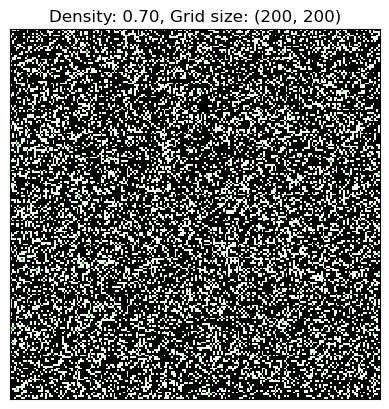

In [10]:
def animate_wind(density, size=(100,100), wind_speed=3):
    '''
    Animates a forest fire
    '''
    fig, ax = plt.subplots()  # Canvas on which the simulation will be displayed

    ax.set_title('Density: {:.2f}, Grid size: {}'.format(density, size))

    ax.tick_params(bottom=False, left=False, labelleft=False, labelbottom=False)  # Turn off axis marks

    ims = []  # Initializes list of visualization at each step

    grid = initialize(density, size)  # Initialize grid

    burning_trees = np.transpose(np.where(grid==2))  # Find burning trees

    # As long as there are burning trees, evolve the grid
    while burning_trees.size > 0:
        grid = evolve(grid, wind = True, wind_speed=wind_speed)

        im = ax.imshow(grid, cmap=cmap, interpolation='nearest', animated=True)  # Visualize status
        ims += [[im]]  # Record status visualization

        burning_trees = np.transpose(np.where(grid==2))  # Read off burning trees after evolution

    ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                    repeat_delay=1000)  # Generate animation
    
    return ani

ani = animate_wind(0.7, (200,200))
ani.save('forest_fire_wind.gif', fps=30)

HTML(ani.to_html5_video())

In [11]:
wind_burnt_pct = []

for density in densities:

    trials = np.zeros(N)
    
    for i in range(N):
        grid = initialize(density)

        final_state, burnt = simulate_wind(grid)

        trees = get_trees(grid)

        trials[i] = burnt/trees

    wind_burnt_pct += [np.average(trials)]

wind_burnt_pct = np.array(wind_burnt_pct)

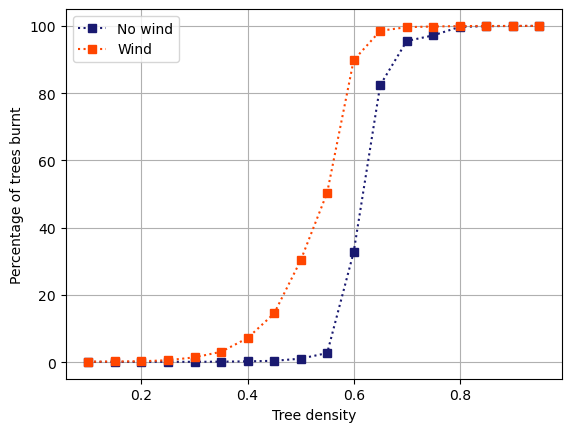

In [12]:
plt.plot(densities, burnt_pct * 100, marker='s', ls=':',
          color='midnightblue', label='No wind')  # Plot burnt pct. against tree density
plt.plot(densities, wind_burnt_pct*100, marker='s', ls=':',
          color='orangered', label='Wind')

plt.xlabel('Tree density')
plt.ylabel('Percentage of trees burnt')


plt.grid()
plt.legend()

plt.show()

At every tree density, the percentage of burnt trees significantly increases. Since wind facilitates the spread of the fire, one expects that the critical density is reduced in the presence of wind and indeed it does as appreciated in the graph above: already at a tree density of 0.6 over 90% of trees burn down. 